<h1><center><center><h1><h1><center><span style="color:#3495eb">Machine Learning Model Building
</span><center><h1>

## Ok... previouslly we said we will use Pipeline 1 to data processing steps

### Now we are going to build the model based on this data processing, these steps is found in `Pipeline.py`

## I will import this file here :

In [1]:
import Pipelines
Pipelines

<module 'Pipelines' from 'C:\\Users\\ahmed_nlhvcl\\my_tasks\\airline passenger\\Pipelines.py'>

# My Librabies :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (RandomForestClassifier, VotingClassifier, BaggingClassifier
                              , AdaBoostClassifier, ExtraTreesClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import (f1_score, confusion_matrix, accuracy_score, recall_score,
                             precision_score, roc_auc_score)
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Remove Warning :

In [3]:
import warnings
warnings.simplefilter("ignore")

# Dataset :

In [4]:
X_train = pd.read_csv('Datasets/xtrain_data.csv',index_col='Unnamed: 0')
y_train = pd.read_csv('Datasets/ytrain_data.csv',index_col='Unnamed: 0')
X_test = pd.read_csv('Datasets/xtest_data.csv',index_col='Unnamed: 0')
y_test = pd.read_csv('Datasets/ytest_data.csv',index_col='Unnamed: 0')

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]
assert X_train.shape[1] == X_test.shape[1]
assert y_train.shape[1] == y_test.shape[1]

### Making data all processing on the `X_train`,`y_train`,`X_test` and `y_test` data

In [5]:
test_data = pd.concat([X_test,y_test],axis=1)

X_train1, y_train1, full_pipeline, enc = Pipelines.Full_pipeline1(X_train,y_train)
X_test1, y_test1 = Pipelines.Production_pipeline(test_data,full_pipeline,enc)

X_train = pd.DataFrame(X_train1)
y_train = pd.DataFrame(y_train1)
X_test = pd.DataFrame(X_test1)
y_test = pd.DataFrame(y_test1)

# used my custom function

### Check my data now :

In [6]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.211898,1.661366,0.558503,...,-0.759347,-0.343350,1.142295,-0.309582,1.272386,-0.940158,-0.581910,-0.571238,-0.325580,-0.569940
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.175758,2.145266,-1.853380,...,0.791732,1.221663,-0.384474,1.217966,-0.262098,-1.696979,1.125422,-1.301970,-0.325580,1.130819
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.624872,-0.819391,-1.317406,...,1.567271,-0.343350,0.378911,1.217966,0.505144,0.573484,0.271756,1.620959,0.432092,1.130819
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.214399,-0.819391,1.697448,...,1.567271,0.439157,1.142295,0.454192,-1.029340,1.330304,0.271756,1.620959,0.432092,0.280439
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.416123,0.743877,-0.111464,...,-1.534887,1.221663,0.378911,-0.309582,1.272386,0.573484,1.125422,0.159495,1.189764,1.130819


In [7]:
y_train.head()

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


## Everything is fine let's go for the model :)

### As stated before our model works well on ensamble learning algorithms... so let's use them here

### While choosing the model I will be concerned more concerned about `f1 score`  <br>and that is because it is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric. <br>  And since that my data target isn't specified weather you want to measure of the correctly identified positive cases from all the predicted positive cases (Precision).<br> OR you want to  measure of the correctly identified positive cases from all the actual positive cases (Recall). <br><br><br><br><br><br>

## Ok Let's go and see some models : <br><br><br><br>

# ----------------------------------------------------------------------------------------------------------

<h1><Font color='#3495eb' size=6>Random Forest :<font><h1>

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

train_score = rf.predict(X_train)
print('Train f1 score :',f1_score(train_score,y_train))

scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['f1'])
print("avg cv f1 score : ", scores['test_f1'].mean())

pred = rf.predict(X_test)
print('test f1 score :',f1_score(pred,y_test))

Train f1 score : 0.9999889237176434
avg cv f1 score :  0.9584494948231432
test f1 score : 0.9558541266794625


### More Insight about model performance on test data :

Model accuracy :  0.9619263935940868
Model precision :  0.9631195466402807
Model recall :  0.9486975013290803
model roc_auc score :  0.9603936791873448


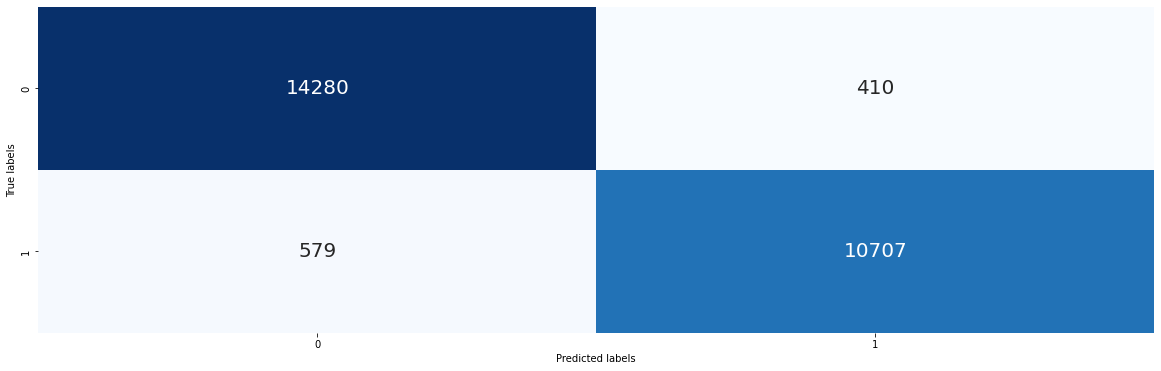

In [9]:
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions()

print('Model accuracy : ', accuracy_score(y_test,pred))
print('Model precision : ', precision_score(y_test,pred))
print('Model recall : ', recall_score(y_test,pred))
print('model roc_auc score : ', roc_auc_score(y_test,pred))

plt.figure(figsize=(20, 6))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,annot_kws={"fontsize":20},fmt='.6g',cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Notes on <Font color='#3495eb'>Random Forest<font> :
> - Very Low bias error <br><br>
> - relatively high variance (high train set overfitting)<br><br>
> - No validation set overfitting

#### Generally random forest is good... I will try to do some Hyper-tunning on it to reduce variance, if that worked then this will be my model


# ----------------------------------------------------------------------------------------------------------

<h1><Font color='#3495eb' size=6>LGBM Classifier :<font><h1>

In [10]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

train_score = lgbm.predict(X_train)
print('Train f1 score :',f1_score(train_score,y_train))

scores = cross_validate(lgbm, X_train, y_train, cv=5, scoring=['f1'])
print("avg cv f1 score : ", scores['test_f1'].mean())

pred = lgbm.predict(X_test)
print('test f1 score :',f1_score(pred,y_test))

Train f1 score : 0.9639967637540453
avg cv f1 score :  0.9605400004863419
test f1 score : 0.9582269979852249


### More Insight about model performance on test data :

Model accuracy :  0.9640822297505389
Model precision :  0.968503937007874
Model recall :  0.9481658692185008
model roc_auc score :  0.9622381422334846


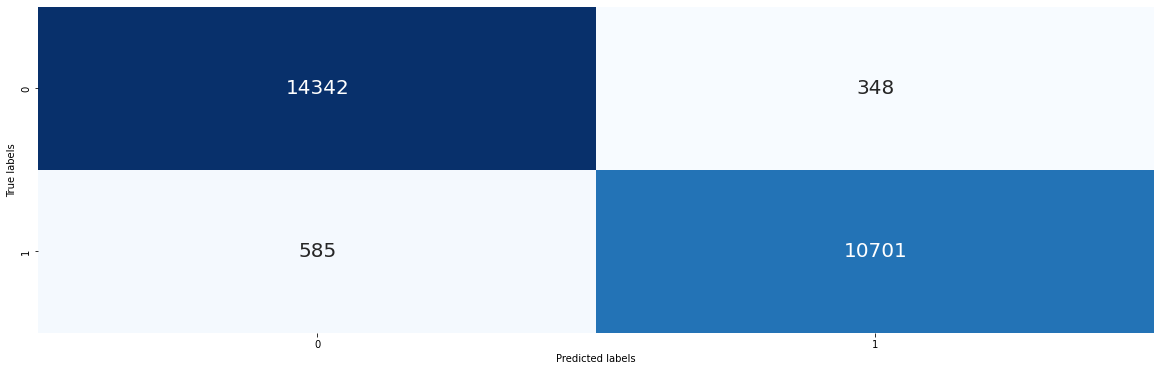

In [11]:
cnf_matrix = confusion_matrix(y_test,pred)

print('Model accuracy : ', accuracy_score(y_test,pred))
print('Model precision : ', precision_score(y_test,pred))
print('Model recall : ', recall_score(y_test,pred))
print('model roc_auc score : ', roc_auc_score(y_test,pred))

np.set_printoptions()

plt.figure(figsize=(20, 6))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,annot_kws={"fontsize":20},fmt='.6g',cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Notes on <Font color='#3495eb'>LGBM Classifier<font> :
> - High bias error <br><br>
> - Low variance (No train set overfitting)<br><br>
> - No validation set overfitting

#### LGBM is doing better on test than random forest and it is not overfitting, but it has high bias error, so if tunning random forest didn't work we will use the LGBM as our model

# ----------------------------------------------------------------------------------------------------------

<h1><Font color='#3495eb' size=6>Adaboast :<font><h1>

In [12]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

train_score = ada.predict(X_train)
print('Train f1 score :',f1_score(train_score,y_train))

scores = cross_validate(ada, X_train, y_train, cv=5, scoring=['f1'])
print("avg cv f1 score : ", scores['test_f1'].mean())

pred = ada.predict(X_test)
print('test f1 score :',f1_score(pred,y_test))

Train f1 score : 0.92461406803961
avg cv f1 score :  0.9249281669527972
test f1 score : 0.9176998153521498


### More Insight about model performance on test data :

Model accuracy :  0.9279334770557438
Model precision :  0.9107329842931937
Model recall :  0.9247740563530037
model roc_auc score :  0.9275674230029145


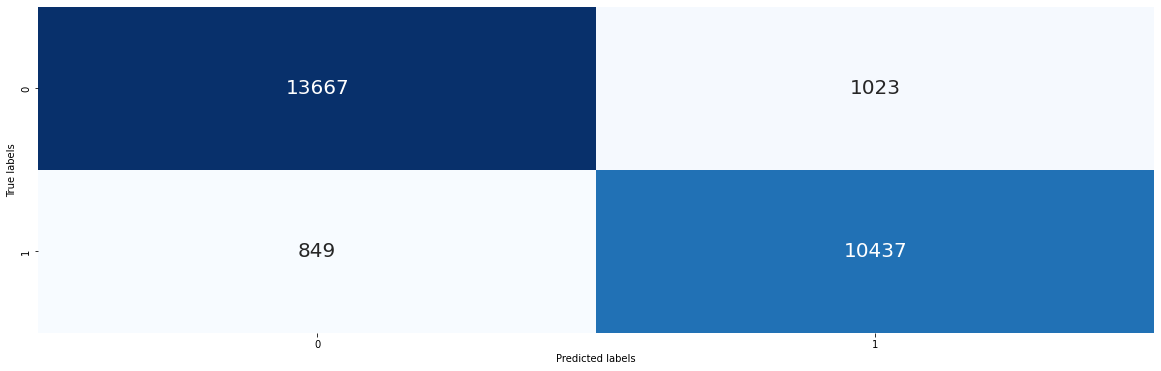

In [13]:
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions()

print('Model accuracy : ', accuracy_score(y_test,pred))
print('Model precision : ', precision_score(y_test,pred))
print('Model recall : ', recall_score(y_test,pred))
print('model roc_auc score : ', roc_auc_score(y_test,pred))

plt.figure(figsize=(20, 6))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,annot_kws={"fontsize":20},fmt='.6g',cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Notes on <Font color='#3495eb'>Adaboast<font> :
> - High bias error <br><br>
> - Low variance (No train set overfitting)<br><br>
> - Little validation set overfitting

#### Compared to previous classifiers.... Adaboast ain't good at all

# ----------------------------------------------------------------------------------------------------------

<h1><Font color='#3495eb' size=6>Extra Trees :<font><h1>

In [14]:
et = ExtraTreesClassifier()

et.fit(X_train,y_train)

train_score = et.predict(X_train)
print('Train f1 score :',f1_score(train_score,y_train))

scores = cross_validate(et, X_train, y_train, cv=5, scoring=['f1'])
print("avg cv f1 score : ", scores['test_f1'].mean())

pred = et.predict(X_test)
print('test f1 score :',f1_score(pred,y_test))

Train f1 score : 1.0
avg cv f1 score :  0.9567487941802488
test f1 score : 0.9535661715509166


### More Insight about model performance on test data :

Model accuracy :  0.9599245457345241
Model precision :  0.9601185664241444
Model recall :  0.9471026049973419
model roc_auc score :  0.9584389811916594


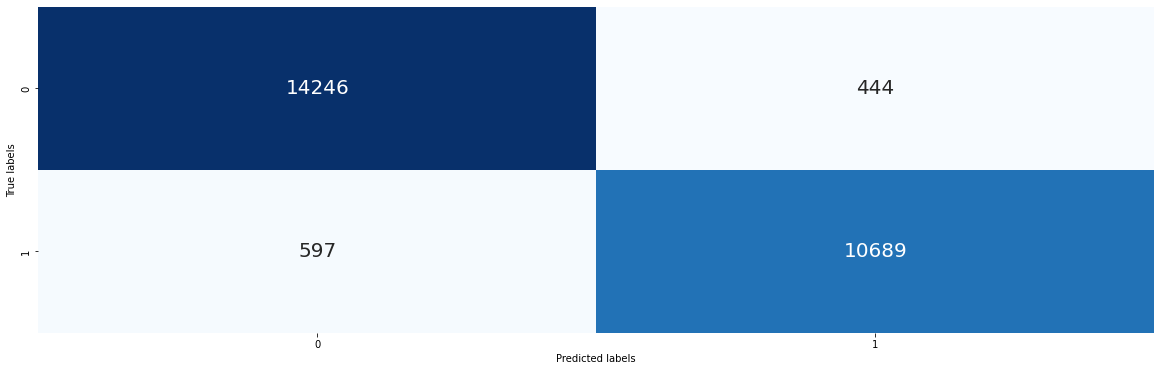

In [15]:
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions()

print('Model accuracy : ', accuracy_score(y_test,pred))
print('Model precision : ', precision_score(y_test,pred))
print('Model recall : ', recall_score(y_test,pred))
print('model roc_auc score : ', roc_auc_score(y_test,pred))

plt.figure(figsize=(20, 6))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,annot_kws={"fontsize":20},fmt='.6g',cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Notes on <Font color='#3495eb'>ExtraTrees <font> :
> - Very low bias error <br><br>
> - High variance (there is train set overfitting)<br><br>
> - No validation set overfitting

#### Just like the random forest... although random forest is much better, but we can try to tune that also 

# ----------------------------------------------------------------------------------------------------------

<h1><Font color='#3495eb' size=6>Voting classifier :</font></h1>
<h5>Using (Random Forest, ExtraTrees, LGBM Classifier)<h5>

In [16]:
rf = RandomForestClassifier()
voting_clf = ExtraTreesClassifier()
lgbm = LGBMClassifier()

voting_clf = VotingClassifier(
     estimators=[('rf', rf), ('voting_clf', voting_clf), ('lgbm', lgbm)],
     voting='hard')

voting_clf.fit(X_train,y_train)

train_score = voting_clf.predict(X_train)
print('Train f1 score :',f1_score(train_score,y_train))

scores = cross_validate(voting_clf, X_train, y_train, cv=5, scoring=['f1'])
print("avg cv f1 score : ", scores['test_f1'].mean())

pred = voting_clf.predict(X_test)
print('test f1 score :',f1_score(pred,y_test))

Train f1 score : 1.0
avg cv f1 score :  0.9596018484565565
test f1 score : 0.9572214027088642


### More Insight about model performance on test data :

Model accuracy :  0.9631582999692023
Model precision :  0.9658998646820027
Model recall :  0.9486975013290803
model roc_auc score :  0.96148285549776


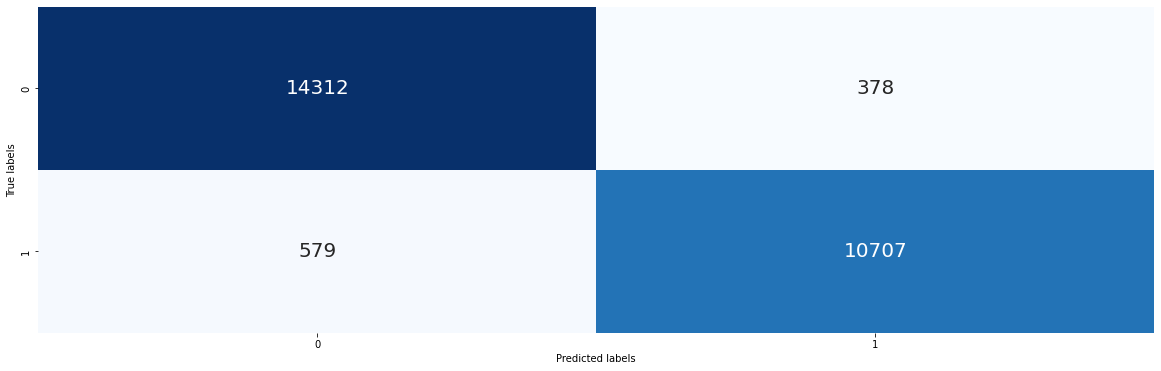

In [17]:
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions()

print('Model accuracy : ', accuracy_score(y_test,pred))
print('Model precision : ', precision_score(y_test,pred))
print('Model recall : ', recall_score(y_test,pred))
print('model roc_auc score : ', roc_auc_score(y_test,pred))

plt.figure(figsize=(20, 6))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,annot_kws={"fontsize":20},fmt='.6g',cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Notes on <Font color='#3495eb'>Voting classifiers<font> :
> - Very low bias error <br><br>
> - High variance (there is train set overfitting)<br><br>
> - No validation set overfitting

#### Sadly voting 3 classifiers didn't make the model better than Random Forest (which was one of the voted classifiers), and it take much time to train so... for now I will go for random forest

# ----------------------------------------------------------------------------------------------------------

<h1><Font color='#3495eb' size=6>Bagging classifier :</font></h1>
<h5>Using (Decision Tree, Bootstrap=True (for bagging))<h5>

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train,y_train)

train_score = bag_clf.predict(X_train)
print('Train f1 score :',f1_score(train_score,y_train))

scores = cross_validate(bag_clf, X_train, y_train, cv=5, scoring=['f1'])
print("avg cv f1 score : ", scores['test_f1'].mean())

pred = bag_clf.predict(X_test)
print('test f1 score :',f1_score(pred,y_test))

Train f1 score : 0.9126895876884756
avg cv f1 score :  0.9121394689103924
test f1 score : 0.9035626535626535


### More Insight about model performance on test data :

Model accuracy :  0.9153834308592547
Model precision :  0.8949243872762037
Model recall :  0.9123693071061492
model roc_auc score :  0.9150342110751983


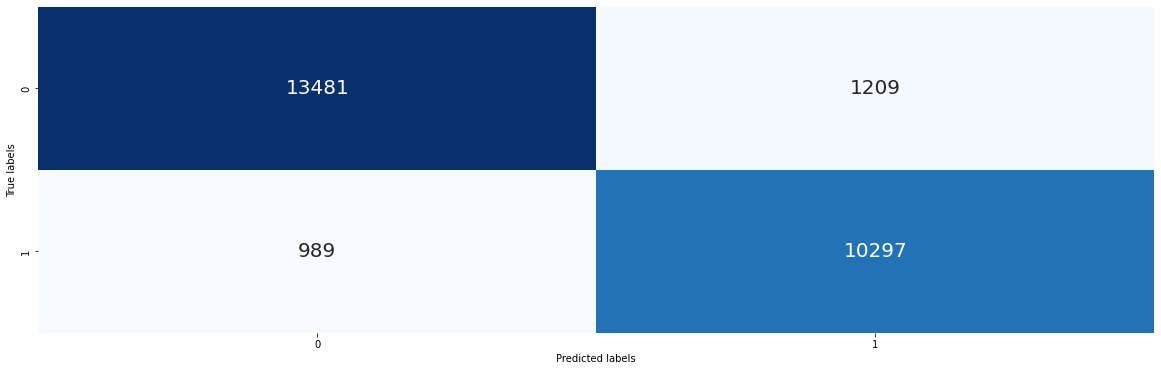

In [19]:
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions()

print('Model accuracy : ', accuracy_score(y_test,pred))
print('Model precision : ', precision_score(y_test,pred))
print('Model recall : ', recall_score(y_test,pred))
print('model roc_auc score : ', roc_auc_score(y_test,pred))

plt.figure(figsize=(20, 6))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,annot_kws={"fontsize":20},fmt='.6g',cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Notes on <Font color='#3495eb'>Bagging classifiers with bootstap=True<font> :
> - Very low High error <br><br>
> - Low variance (there is train set overfitting)<br><br>
> - Little validation set overfitting

#### I didn't expect that.... I assumed that bagging will have a good Performance, but it didn't

# ----------------------------------------------------------------------------------------------------------

## Let's do grid search and see if there is something better...

In [20]:
rf_tune = RandomForestClassifier(n_jobs=-1)

param_grid = [{'n_estimators': [300, 280],'max_features': [10, 12],'max_depth': [25,30]}]

grid_search = GridSearchCV(rf_tune, param_grid, cv=4, refit=True,scoring='f1',return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 25, 'max_features': 12, 'n_estimators': 300}

In [21]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9600971729668694 {'max_depth': 25, 'max_features': 10, 'n_estimators': 300}
0.9600983828618566 {'max_depth': 25, 'max_features': 10, 'n_estimators': 280}
0.9603794338122345 {'max_depth': 25, 'max_features': 12, 'n_estimators': 300}
0.9602658099266863 {'max_depth': 25, 'max_features': 12, 'n_estimators': 280}
0.9600638468947078 {'max_depth': 30, 'max_features': 10, 'n_estimators': 300}
0.9601540728030098 {'max_depth': 30, 'max_features': 10, 'n_estimators': 280}
0.9600051124323414 {'max_depth': 30, 'max_features': 12, 'n_estimators': 300}
0.960135484511909 {'max_depth': 30, 'max_features': 12, 'n_estimators': 280}


In [22]:
rf_tune = RandomForestClassifier(max_depth = 30, max_features = 10, n_estimators = 300,n_jobs=-1)

rf_tune.fit(X_train,y_train)

train_score = rf_tune.predict(X_train)
print('Train f1 score :',f1_score(train_score,y_train))

scores = cross_validate(rf_tune, X_train, y_train, cv=5, scoring=['f1'])
print("avg cv f1 score : ", scores['test_f1'].mean())

pred = rf_tune.predict(X_test)
print('test f1 score :',f1_score(pred,y_test))

Train f1 score : 0.999822753960341
avg cv f1 score :  0.96014038275062
test f1 score : 0.9589862989164502


Model accuracy :  0.964736680012319
Model precision :  0.9693157132512672
Model recall :  0.9488747120326068
model roc_auc score :  0.9628988944778417


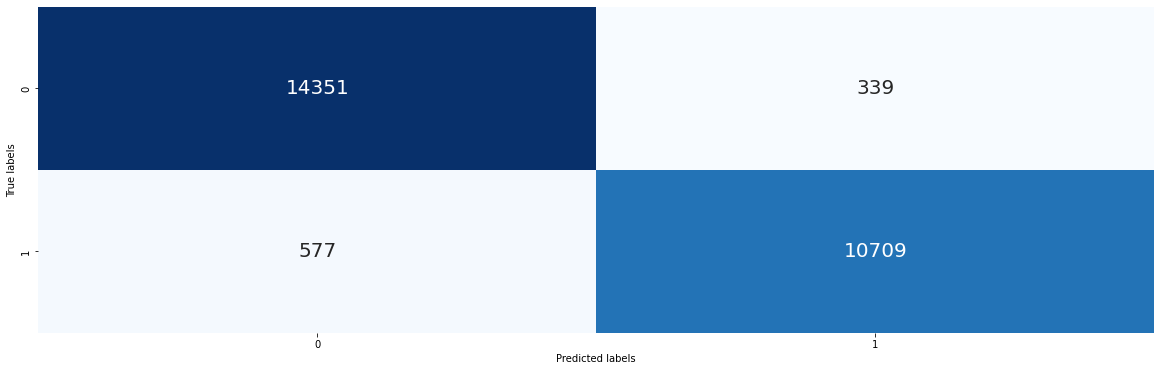

In [23]:
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions()

print('Model accuracy : ', accuracy_score(y_test,pred))
print('Model precision : ', precision_score(y_test,pred))
print('Model recall : ', recall_score(y_test,pred))
print('model roc_auc score : ', roc_auc_score(y_test,pred))

plt.figure(figsize=(20, 6))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,annot_kws={"fontsize":20},fmt='.6g',cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Ok at least we get a little better :)

### Now the best model is for the tuned random forest.... and there is still place to decrease the variance again and build better model... I may try to do this later

<br><br><br><br><br><br>

## Before we go let's try a deep learning approach and see where will it take us to
<br><br><br><br><br><br>

<h1><Font color='#3495eb' size=6>Building small Neural Network :<font><h1>

In [24]:
early_stop= EarlyStopping(mode='min',verbose=1, patience=25)

model=Sequential()

model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=14,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=200, batch_size=256*2,validation_split=0.2)

Epoch 1/200
142/142 [==============================] - 2s 3ms/step - loss: 0.4818 - accuracy: 0.7755 - val_loss: 0.3266 - val_accuracy: 0.8692
Epoch 2/200
142/142 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8949 - val_loss: 0.2302 - val_accuracy: 0.9067
Epoch 3/200
142/142 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.9181 - val_loss: 0.1982 - val_accuracy: 0.9173
Epoch 4/200
142/142 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.9276 - val_loss: 0.1786 - val_accuracy: 0.9266
Epoch 5/200
142/142 [==============================] - 0s 1ms/step - loss: 0.1641 - accuracy: 0.9324 - val_loss: 0.1672 - val_accuracy: 0.9289
Epoch 6/200
142/142 [==============================] - 0s 1ms/step - loss: 0.1555 - accuracy: 0.9355 - val_loss: 0.1637 - val_accuracy: 0.9286
Epoch 7/200
142/142 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9368 - val_loss: 0.1537 - val_accuracy: 0.9333

Epoch 58/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9565 - val_loss: 0.1092 - val_accuracy: 0.9511
Epoch 59/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 0.9566 - val_loss: 0.1099 - val_accuracy: 0.9515
Epoch 60/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9566 - val_loss: 0.1090 - val_accuracy: 0.9494
Epoch 61/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9557 - val_loss: 0.1082 - val_accuracy: 0.9502
Epoch 62/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9565 - val_loss: 0.1074 - val_accuracy: 0.9522
Epoch 63/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9567 - val_loss: 0.1071 - val_accuracy: 0.9514
Epoch 64/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9563 - val_loss: 0.1079 - val_accuracy:

Epoch 115/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9582 - val_loss: 0.1065 - val_accuracy: 0.9504
Epoch 116/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9587 - val_loss: 0.1071 - val_accuracy: 0.9502
Epoch 117/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9582 - val_loss: 0.1057 - val_accuracy: 0.9515
Epoch 118/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9589 - val_loss: 0.1055 - val_accuracy: 0.9526
Epoch 119/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9586 - val_loss: 0.1093 - val_accuracy: 0.9508
Epoch 120/200
142/142 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9583 - val_loss: 0.1074 - val_accuracy: 0.9522
Epoch 121/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9583 - val_loss: 0.1057 - val_ac

142/142 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9597 - val_loss: 0.1037 - val_accuracy: 0.9529
Epoch 172/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9593 - val_loss: 0.1084 - val_accuracy: 0.9489
Epoch 173/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9587 - val_loss: 0.1051 - val_accuracy: 0.9509
Epoch 174/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9590 - val_loss: 0.1050 - val_accuracy: 0.9534
Epoch 175/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9593 - val_loss: 0.1039 - val_accuracy: 0.9537
Epoch 176/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9594 - val_loss: 0.1062 - val_accuracy: 0.9524
Epoch 177/200
142/142 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9591 - val_loss: 0.1045 - val_accuracy: 0.9524

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                400       
                                                                 
 dense_1 (Dense)             (None, 14)                238       
                                                                 
 dense_2 (Dense)             (None, 8)                 120       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 54        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 891
Trainable params: 891
Non-trainable pa

812/812 [==============================] - 1s 585us/step
Model accuracy :  0.956575300277179
Model precision :  0.9507454739084132
Model recall :  0.9492291334396598
model roc_auc score :  0.9557241650860654
model f1 score :  0.9499866985900505


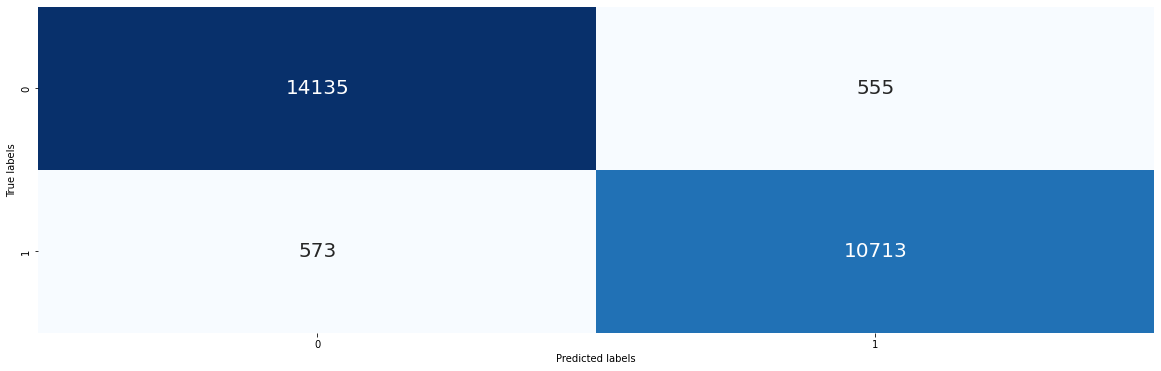

In [26]:
pred = model.predict(X_test)
pred = (pred > 0.4)

cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions()

print('Model accuracy : ', accuracy_score(y_test,pred))
print('Model precision : ', precision_score(y_test,pred))
print('Model recall : ', recall_score(y_test,pred))
print('model roc_auc score : ', roc_auc_score(y_test,pred))
print('model f1 score : ',f1_score(y_test,pred))

plt.figure(figsize=(20, 6))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,annot_kws={"fontsize":20},fmt='.6g',cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Ok, we can still do many thing with this Neural Network, we can increase units or layers to decrease bias error... then we can use dropout to reduce variance

## But for now the best made model goes for the tuned `Random Forest`

In [27]:
rf_tune

RandomForestClassifier(max_depth=30, max_features=10, n_estimators=300,
                       n_jobs=-1)

In [28]:
import joblib

joblib.dump(rf_tune, 'tuned_randomforest_model.pkl')

['tuned_randomforest_model.pkl']

# Now this Model is saved and ready to be reloaded again :)

# Finally this is the End